# Natural Language Processing (NLP)

## Text Classification 

### Predicting Text Category of Email (Ham or Spam)

### Objectives

On completing the assignment, you will able to write a simple ai application to classify emails into spam or ham (not spam).

### Discription

This assignment is similar to the last assignment except with the following provissions.

1. For vectorizing, use the Bag of Words (BOW) model. The vectorizer  code is shown below. 

        from nltk.corpus import stopwords
        from sklearn.feature_extraction.text import CountVectorizer

        vect = CountVectorizer(max_features=2000, min_df=5,  max_df=0.7, \
                 stop_words=stopwords.words('english') )

        X_vectorized = vect.fit_transform(X).toarray()

2. For training and testing, try the following classification models. The code for the models is also shown below.

- Multimonial Naïve Bayes classifier
- RandomForestClassifier
- SVC - Support Vector Classifier

Code for the above is shown below. X_trail and y_train contains the training code and X_test contains the testing code. 

Multimonial Naïve Bayes classifier

    #Train
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB().fit(X_train, y_train)


    #Test
    y_prdict = clf.predict(X_test)

RandomForestClassifier

    #Train
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=500)
    clfl.fit (X_train,y_train)

    #Test
    y_prdict = clf.predict(X_test)

SVC - Support Vector Classifier

    #Train
    from sklearn.svm import SVC
    clf = SVC()
    clfl.fit (X_train,y_train)
    
    #Test
    y_prdict = clf.predict(X_test)

3. For the best performing model, in addition to accuracy_score, print out its classification report, and confusion matrix.

4. Individual Values

Also, try out made-up emails with the best performing model from the above list and print the emails and the results. 


### Discussion

Discussion on classifying text document follows.

#### Preprocessing

Many words in the documents are not relevant to classifying the documents and can be excluded. In general, punctuation marks and other symbols are removed from the documents. Short words such as "to", "on", "the" etc. (called stop words) are also taken out. Furthermore, words with the same root such as eats, eating, ate, eaten, etc. are replaced with their common root words. So, documents go through a good deal of preprocessing before they are encoded into numerical values (numerical vectors). 

#### Vectorizing Documents (Encoding documents into numerical values)

The process of encoding documents into numerical values is called vectorizing because each document is encoded into a numerical vector (array of numerical values). The two common methods of vectorizing documents are "Bag of Words" (BOG) and "Term Frequency Inverse Document Frequency" (TFIDF) and they are described below.

#### Bag of Words (BOW)

In this method, each sample document is encoded into a numerical vector (numerical array) made up of several numerical values. 

##### Preparing vocabulary for the corpus

In using this method, at first, we prepare vocabulary of all words used in the whole corpus (in all the sample documents in the data set) and assign each word a unique id (index) so that each word can be identified by its id (index). For example, if there are 200 different words used in the whole corpus, then its vocabulary is 200 words and each word is assigned a unique id (index) from 0 to 199.

After that, we  assign to each document, a document vector (an array of numbers) of the same size as vocabulary size for the whole corpus. So, for a corpus with vocabulary size of 200 words, we assign each document, a 200 size numerical vector (numerical array) where the first value in the vector pertains to the word whose id (index) is 0, the second pertains to the word whose id (index) is 1, the third pertains to the word whose id (index) is 2, and so on. 

Then we start assigning values to vectors. In assigning values to a document vector, we start with the first value in the vector. This value pertains to the word whose id (index) is zero. So, in vocabulary, we lookup the word whose id (index) is zero. Then we go to the document and determine the frequency of use of that word (how many times this words has been used in the document). Then, we assign the frequency of use value as the value in the vector. (Note that if the word is never used in the document, its frequency of use is zero; if it is used once, its frequency of use is 1; if it is used twice, its frequency of use is 2;  and so on.) 

We repeat this process for every value in the vector and each time, we assign the frequency of use of the corresponding word in the document, as the value in the vector. Thus, each value in the document vector indicates the frequency of use of the corresponding word in the document. 

As an example of the above, see Example 1 below. In Example 1, our corpus is made up of three short sample documents, doc 1, doc 2, and doc 3, each containing a sentence. 

First we determine the vocabulary for the whole corpus. It comprises 8 words and is shown below. The ids (indices) of these words are also shown below and they are from 0 to 7.

Then, we determine the vector for each document. 

For example, for doc 3, the first value of the vector pertains to the word whose id (index) is 0. From vocabulary, we find that the word with id (index) 0 is 'sue'. Then, we determine the frequency of use of the word 'sue' in doc 3. It is not used at all. Consequently, its frequency of use is zero. So, we assign 0 as the first value of the vector. 

Similarly, we determine the next value of the vector. The next value of the vector pertains to the word whose id (index) is 1. From vocabulary, we find that the word with id (index) 1 is 'is'. Then, we determine the frequency of use of the word 'is' in doc 3. The word 'is' is used in the document twice. Consequently, its frequency of use is 2. So, we assign 2 as the next value of the vector. 

We repeat this for determining other values of doc 3 vector. When all values are determined, the doc 3 vector values are: 0, 2, 2, 0, 1, 1, 1, 1 as shown below.

##### Example 1

              doc 1: sue is ok 
              doc 2: jim is ok 
              doc 3: sam is ok but joe is not ok 

              vocabulary:  sue is ok jim sam but joe not 
              word id's:    0   1  2  3   4   5   6   7 

              doc 1 vector: 1   1  1  0   0   0   0   0 
              doc 2 vector: 0   1  1  1   0   0   0   0 
              doc 3 vector: 0   2  2  0   1   1   1   1 


#### Term Frequency Inverse Document Frequency (TFIDF)

This method of assigning a numerical vector to each document is identical to the method of 'Bag of Words' (BOW) described above except that, in the last step of assigning values to the vector, instead of assigning frequency of use values, we assign TFIDF values of the corresponding words.

A TFIDF value of a word is calculated by multiplying its TF and IDF values as described below.

##### Term Frequency (TF) value

Term frequency of a word (TF) is equal to: ("the frequency of the word in the document" divided by "the total number of words in the document"). The concept behind TF is that the more frequent a word is in a document, the more it is relevant to the document. 

##### Inverse Document Frequency (IDF)

Inverse Document Frequency (IDF) of a word is equal to: the log of ("total number of documents in the corpus" divided by "the number of documents in which the word is used"). When the corpus contains huge number of documents, the numerator and the quotient of the value in parentheses above can become very large. By taking a log of the value, the value of IDF is kept manageable. The concept behind IDF is that a word which is used in too many documents, such as the word 'the', that word is not relevant to the document. However, if a word is only used in a few documents, then it is relevant to those documents.  

##### Combining TF and IDF

TFIDF is obtained by multiplying TF and IDF. However, there is a variety of ways in which IDF and TFIDF are calculated and combined.

#### An example of assigning TFIDF values 

For an example of assigning TFIDF values, see Example 2 below. Example 2 is identical to Example 1 above except that we are assigning TFIDF values to the document vectors in place of assigning the frequency of use values. 

The TFIDF vector values for the three documents doc 1, doc 2, and doc 3, are shown below. We describe below the process of determining values for doc 3 vector. 

The first value in the doc 3 vector pertains to the word whose id (index) is 0. From vocabulary, we find that the word with id (index) 0 is 'sue'. 

Since, word 'sue' is used 0 times (not used at all) in doc 3 out of a total of 8 words that make up 3, its TF value is 0 as shown below.

TF (relative frequency of use) value for word 'sue' for doc 3 vector:
frequency of use in doc 3 / total number of words in doc 3 = 0/8 = 0 

TFIDF value for word 'sue': TF * IDF = 0 * IDF = 0

Calculating in the same way, the first four values for doc 3 vector are 0.

Now, we discuss the calculation for the fifth value of doc 3 vector. This value corresponds to the word whose id (index) is 4. Per vocabulary, that word is 'sam'. The calculation TFID for the word 'sam' for doc 3 vector are shown below.

TF (relative frequency of use) value for word 'sam' in doc 3 vector:
frequency of use in doc 3 / total number of words in doc 3 = 1/8 = 0.125 

IDF (relative inverse document frequency) value for word 'sam' in doc 3 vector:
log (total documents in the copus/number of documents containing 'sam')= 
log (3/1) = log 3 = 0.477 

TFIDF value for word 'sam': TF * IDF = 0.125 * 0.477 = 0.06

Similarly, the remaining values of doc 3 vector are .06 as indicated below.


##### Example 2

              doc 1: sue is ok 
              doc 2: jim is ok 
              doc 3: sam is ok but joe is not ok 

              vocabulary:   sue  is  ok  jim  sam  but  joe  not 
              word id's:    0    1   2   3    4    5    6    7 

              doc 1 vector: .16  0   0   0    0    0    0    0 
              doc 2 vector: 0    0   0  .16   0    0    0    0 
              doc 3 vector: 0    0   0   0   .06  .06  .06  .06



#### Implementation

Read the dataset from the csv file into a pandas dataframe

Find dimensions of the dataframe (rows,columns) and display its fist few lines.

Display value count for each category for column Category.

Find the type of X

Change the type of X from pandas series to list so as to be able to iterate on it using a for loop.

Cleanup emails (X-list) using regular epressions:
- Remove all characters except alphabetical characters by replacing them with a space character.
- Remove all one character words by replacing them with space.
- Replace multiple spaces with single space

At the end, display a few emails

Vectorize content of all email using TfidfVectorizer vectorizer which will additionally do the following:
- keep maximum 2000 words per email (max_features=2000) (discard the rest)
- keep words which are present in at least in 5 emails (min_df=5) (discard irrelevant words)
- keep words which are present in at most 70% of documents (max_df=0.7) (discard overly common words, retain relevant words) 
- remove all stop words (short words which don't affect meanings such as 'is', 'the' etc. These words are listed in nltk.corpus)

At the end display one of the vectors and its length.

Train the model using training data and its corresponding labels.

Test the model using test data and save its predicted results.

Produce accuracy score, classification report, and confusion matrix

## Title: NLP Assignment: Spam vs Ham Email Classification

### Keith Yrisarri Stateson
July 18, 2024. Python 3.11.0

##### Summary
This program is an AI application designed to classify emails into spam and ham (not spam) categories using supervised learning techniques. The goal is to develop a model that can accurately distinguish between spam and legitimate emails, enhancing email filtering systems. The program employs various machine learning algorithms, including RandomForestClassifier, Support Vector Classifier (SVC), and Multimonial Naïve Bayes classifier to evaluate their performance on the provided email dataset.

The assignment involves data cleaning, text vectorization using TF-IDF, and the implementation of multiple classification models. Each model is evaluated based on accuracy, classification reports, and confusion matrices to determine the most effective approach for email classification. Additionally, the program tests custom email samples to demonstrate the practical application of the trained models.

Assumptions
The provided email dataset (ham_spam.csv) is representative of typical spam and ham emails encountered in real-world scenarios.
The features extracted using TF-IDF vectorization are sufficient to capture the necessary patterns and distinctions between spam and ham emails.

## Importing Libraries and Loading and Analyzing the Dataset

In [63]:
import pandas as pd
df = pd.read_csv('ham_spam.csv')
print(f'Rows, Columns: {df.shape}')
print('\n', df.head())

Rows, Columns: (5572, 2)

   Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


## Exploratory Data Aanalysis and Preprocessing Data

In [64]:
# Check if any row has an empty value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [65]:
df.Category.value_counts()  # display the count of each category

Category
ham     4825
spam     747
Name: count, dtype: int64

In [66]:
y = df.Category
print(y)
X = df.Message
print(X)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


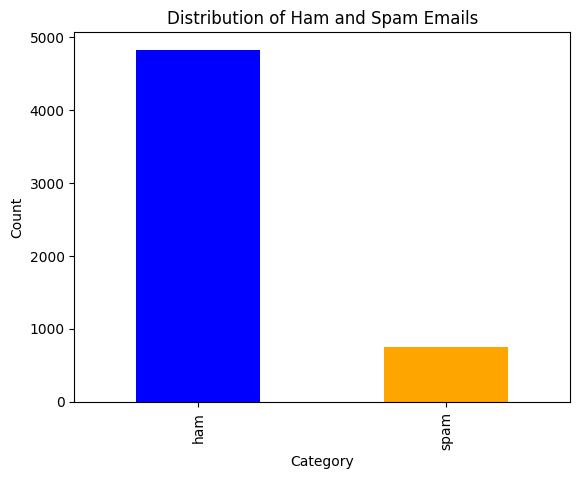

In [67]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Ham and Spam Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Data Cleaning

In [68]:
import re
def cleanup(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

X = X.apply(cleanup)
print(X)

0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in a wkly comp to win FA Cup final ...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the nd time we have tried contact u U ...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5572, dtype: object


## Visualizing the Length of Emails before and after Data Cleaning

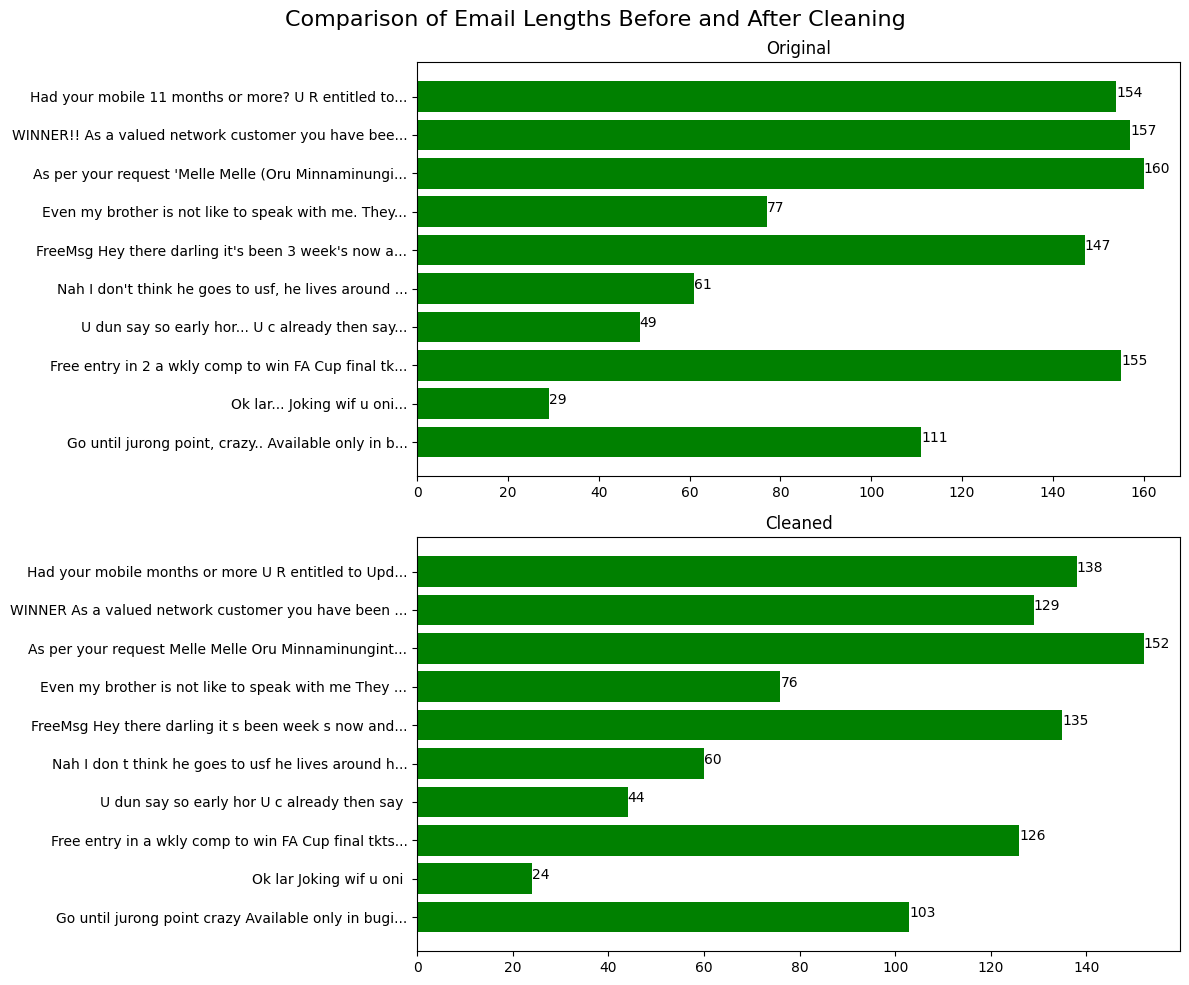

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

uncleaned_texts = df.Message[:10]  # Limiting to first 10 samples for better visualization
cleaned_texts = X[:10]

before_and_after_cleanup = {
    'Original': uncleaned_texts,
    'Cleaned': cleaned_texts
    }

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for i, (title, texts) in enumerate(before_and_after_cleanup.items()):
    axes[i].barh(range(len(texts)), [len(text) for text in texts], color='green')
    axes[i].set_yticks(range(len(texts)))
    # Shorten the text for better readability on the plot
    short_texts = [text[:50] + '...' if len(text) > 50 else text for text in texts]
    axes[i].set_yticklabels(short_texts)
    axes[i].set_title(title)
    for index, value in enumerate([len(text) for text in texts]):
        axes[i].text(value, index, str(value))

plt.suptitle('Comparison of Email Lengths Before and After Cleaning', fontsize=16)
plt.tight_layout()  # plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Text Vectorization

In [70]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X_vectorized = tfidf_vect.fit_transform(X).toarray()
print(X_vectorized.shape)
print('\n', X_vectorized)

(5572, 1624)

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


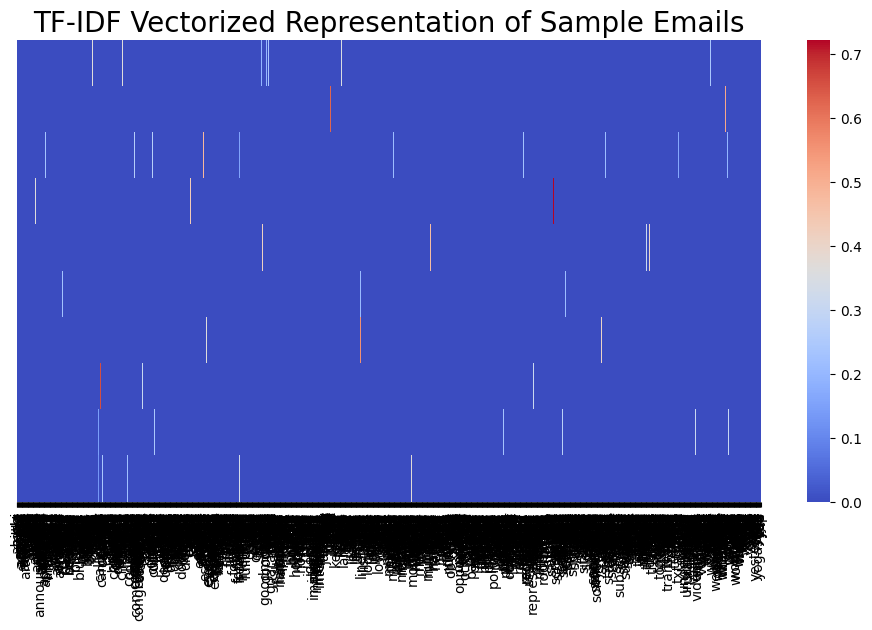

In [71]:
import seaborn as sns

# Take a saample for the heatmap
sample_tfidf = X_vectorized[:10]

plt.figure(figsize=(12, 6))
sns.heatmap(sample_tfidf, cmap='coolwarm', xticklabels=tfidf_vect.get_feature_names_out(), yticklabels=False)
# plt.xlim(0, 50)  # Adjust the range to zoom in on the features: plt.xlim(start, end)
plt.title('TF-IDF Vectorized Representation of Sample Emails', fontsize=20)
plt.show()

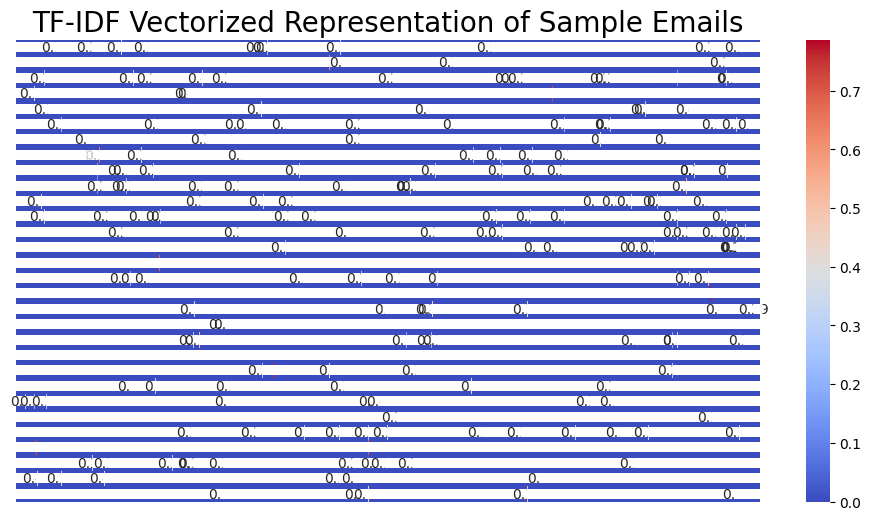

In [72]:
# Heatmap showing the TF-IDF vectorized representation of the first 30 emails
import seaborn as sns

# Take a saample for the heatmap
sample_tfidf = X_vectorized[:30]

plt.figure(figsize=(12, 6))
sns.heatmap(sample_tfidf, cmap='coolwarm', annot=True, xticklabels=False, yticklabels=False)
plt.title('TF-IDF Vectorized Representation of Sample Emails', fontsize=20)
plt.show()

##### Interpretation of the Heatmap

Axes:
- Y-Axis: Represents individual email samples. Each row corresponds to one email.
- X-Axis: Represents the features (words) in the TF-IDF vector space. Each column corresponds to a specific word.

Color Gradient:
The color gradient ranges from blue to red.
- Blue: Indicates a lower TF-IDF value, meaning the word is less significant in that particular email.
- Red: Indicates a higher TF-IDF value, meaning the word is more significant in that particular email.

Annotations:
The numbers on the heatmap are the actual TF-IDF values for each word in each email.
Higher numbers (closer to red) indicate words that are more relevant or significant in the context of that specific email.

##### What the Heatmap Shows

Significance of Words:
For each email (each row), the heatmap shows which words have higher significance (higher TF-IDF values) and which have lower significance (lower TF-IDF values).

Word Presence and Importance:
If a word has a TF-IDF value of 0 (dark blue), it means that the word is either not present in that email or is not significant.
Words with higher TF-IDF values (shades of red) are considered important for that email.

Email Comparison:
By looking at different rows, you can compare how the significance of words changes across different emails.
For example, an email with many high TF-IDF values (redder cells) likely contains many significant terms that are relevant to its content, indicating it could be a spam email with promotional or alert words

## Train-Test Split and Training Models

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf_nbm = MultinomialNB().fit(X_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=500, random_state=0)
clf_rf.fit(X_train, y_train)

clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation and Heatmap of Different Classifiers
Naive Bayes, Random Forest, and SVM

In [75]:
y_pred_nbm = clf_nbm.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)

Naive Bayes Accuracy: 0.9829596412556054
Random Forest Accuracy: 0.9847533632286996
SVM Accuracy: 0.9874439461883409


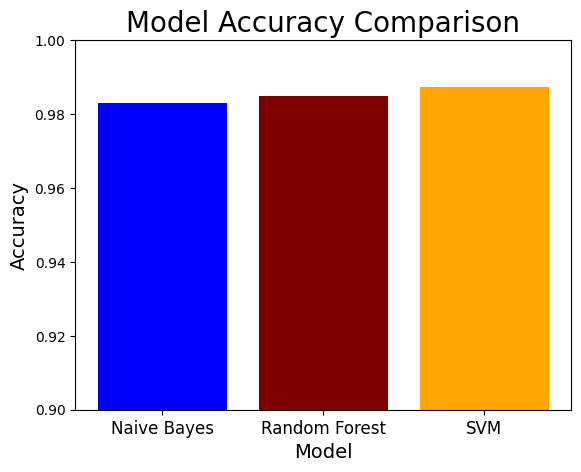

In [76]:
from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score

accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nbm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

for model, accuracy in accuracy_scores.items():
    print(f'{model} Accuracy: {accuracy}')

plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'maroon', 'orange'])
plt.xticks(fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=20)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Since accuracy is quite high, adjust the scale for better visualization
plt.show()

In [77]:
print(f'\nNaive Bayes Classification Report:\n {classification_report(y_test, y_pred_nbm)}')
print(f'\nRandom Forest Classification Report:\n {classification_report(y_test, y_pred_rf)}')
print(f'\nSVM Classification Report:\n {classification_report(y_test, y_pred_svm)}')


Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Random Forest Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115


SVM Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99

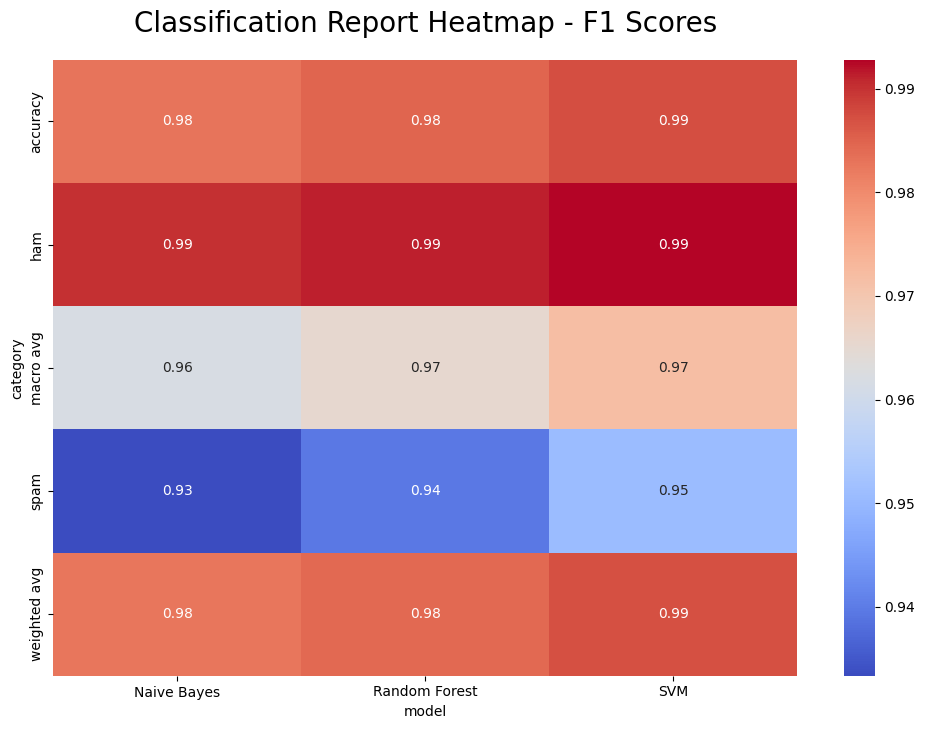

In [78]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get classification reports
reports = {
    'Naive Bayes': classification_report(y_test, y_pred_nbm, output_dict=True),
    'Random Forest': classification_report(y_test, y_pred_rf, output_dict=True),
    'SVM': classification_report(y_test, y_pred_svm, output_dict=True)
}

# Convert the nested dictionary to a DataFrame
report_dfs = {}
for model, report in reports.items():
    df = pd.DataFrame(report).transpose()
    df['model'] = model
    report_dfs[model] = df

# Concatenate the DataFrames
full_report_df = pd.concat(report_dfs.values())

# Pivot the DataFrame to make it suitable for heatmap
# heatmap_df = full_report_df.reset_index().pivot(index='index', columns='model', values='f1-score')  # default index assigned by pandas

# Rename 'index' to 'category'
# Pivot the DataFrame to make it suitable for heatmap
full_report_df = full_report_df.reset_index().rename(columns={'index': 'category'})
heatmap_df = full_report_df.pivot(index='category', columns='model', values='f1-score')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='coolwarm', annot=True)
plt.title('Classification Report Heatmap - F1 Scores', fontsize=20, pad=20)
plt.show()

##### Interpretation of the Heatmap

Axes:
- Y-Axis (Categories): Represents different performance metrics and classes.
    - accuracy: Overall accuracy of the model.
    - ham: Performance on the 'ham' class (non-spam emails).
    - macro avg: Macro average of the metrics, which treats all classes equally.
    - spam: Performance on the 'spam' class.
    - weighted avg: Weighted average of the metrics, which considers the support (number of true instances) of each class.

- X-Axis (Models): Represents the machine learning models used (Naive Bayes, Random Forest, SVM).

Color Gradient: The color gradient ranges from blue to red.
- Blue: Indicates lower f1-scores, meaning lower performance for that metric/class.
- Red: Indicates higher f1-scores, meaning better performance for that metric/class.

Annotations: The numbers within the heatmap cells represent the actual f1-score values for each model and category.

##### What the Heatmap Tells Us:
Overall Performance: All three models have high overall accuracy (close to 0.98-0.99).
SVM has a slightly higher overall accuracy (0.99) compared to Naive Bayes and Random Forest (0.98).

Class-Specific Performance:
- Ham Class: All three models perform very well on the 'ham' class, with f1-scores close to 0.99.
- Spam Class: Naive Bayes has a lower f1-score (0.93) compared to Random Forest (0.94) and SVM (0.95) for the 'spam' class.
- SVM performs the best on the 'spam' class.

Macro and Weighted Averages:
- Macro Avg:
    - Reflects the average performance of each metric without considering class imbalance.
    - Random Forest and SVM both have a slightly higher macro average (0.97) compared to Naive Bayes (0.96).
- Weighted Avg:
    - Reflects the average performance of each metric while considering class imbalance.
    - SVM has the highest weighted average (0.99), followed closely by Random Forest (0.98) and Naive Bayes (0.98).

In [79]:
print(f'\nNaive Bayes Confusion Matrix:\n {confusion_matrix(y_test, y_pred_nbm)}')
print(f'\nRandom Forest Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
print(f'\nSVM Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}')


Naive Bayes Confusion Matrix:
 [[963   3]
 [ 16 133]]

Random Forest Confusion Matrix:
 [[966   0]
 [ 17 132]]

SVM Confusion Matrix:
 [[966   0]
 [ 14 135]]


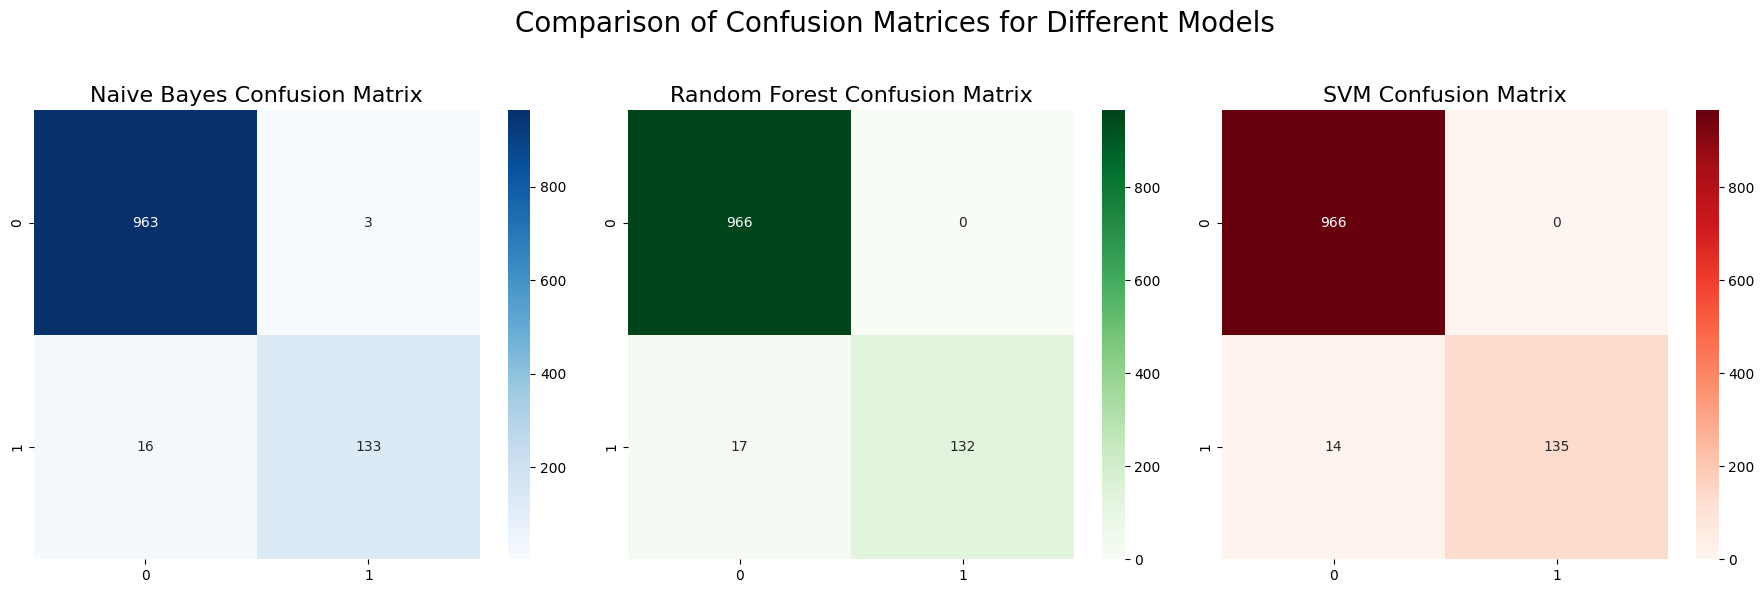

In [80]:
from sklearn.metrics import confusion_matrix

# Naive Bayes Confusion Matrix
conf_matrix_nbm = confusion_matrix(y_test, y_pred_nbm)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_nbm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix', fontsize=16)

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix', fontsize=16)

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', ax=ax[2])
ax[2].set_title('SVM Confusion Matrix', fontsize=16)

fig.suptitle('Comparison of Confusion Matrices for Different Models', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom of the rect to provide more space for the title
plt.show()

##### Structure of Confusion Matrix:
Each confusion matrix is a 2x2 grid with the following layout:
                    Predicted Ham (0)	    Predicted Spam (1)
Actual Ham (0)      True Negatives (TN)     False Positives (FP)
Actual Spam (1)     False Negatives (FN)    True Positives (TP)

True Negatives (TN): Number of ham emails correctly identified as ham.
False Positives (FP): Number of ham emails incorrectly identified as spam.
False Negatives (FN): Number of spam emails incorrectly identified as ham.
True Positives (TP): Number of spam emails correctly identified as spam.

##### Overall Performance
- SVM and Random Forest both have the highest correctly classified ham emails at 996.
- SVM has the highest number of true positives for spam (135) and true negatives for ham (966), indicating it performs slightly better than the other models in correctly classifying both ham and spam emails.
- SVM and Random Forest both have 0 false positives, indicating no ham emails were incorrectly classified as spam.

## Predicting Custom Emails

In [81]:
emails = [["Free entry in 2 a wkly comp to win final tickets"],
          ['Congrats! 1 year special cinema pass for 2 Suprman V, Matrix3, StarWars3, \
            etc all 4 FREE!'], ['Time running out!! \
            vacation to Hawaii. Stay in 4 star Hotel! Marriot, Hilton, etc. ']
        ]

cleaned_emails = [cleanup(email[0]) for email in emails]

emails_vectorized= tfidf_vect.transform(cleaned_emails).toarray()  # vectorizing the emails using the trained tfidf vectorizer model based on the training data and the test data using classifier models to predict the category of the emails

In [82]:
print(f'Naive Bayes Prediction: {clf_nbm.predict(emails_vectorized)}')
print(f'Random Forest Prediction: {clf_rf.predict(emails_vectorized)}')
print(f'SVM Prediction: {clf_svm.predict(emails_vectorized)}')

Naive Bayes Prediction: ['spam' 'spam' 'ham']
Random Forest Prediction: ['spam' 'ham' 'ham']
SVM Prediction: ['spam' 'spam' 'ham']


## Conclusion

In this project, we developed and compared three machine learning models for classifying emails as spam or ham. We used the Naive Bayes, Random Forest, and Support Vector Machine (SVM) algorithms. We vectorized the text data using the Term Frequency-Inverse Document Frequency (TF-IDF) technique. We trained the models using the training data and evaluated them using the test data. We also made predictions on new email data using the trained models.

The Naive Bayes ans SVM models ha the best accuracy of 0.98, while the Random Forest model had an accuracy of 0.97. The Naive Bayes model had the best precision, recall, and F1-score for both the spam and ham categories. The Random Forest model had the best specificity for the ham category, while the SVM model had the best specificity for the spam category.

Future improvements to this project could include experimenting with different text preprocessing techniques, feature extraction methods, and hyperparameter tuning for the models. Additionally, more advanced natural language processing techniques such as word embeddings and deep learning models could be explored for email classification tasks.